# How much are we still undercounting COVID-19 cases? 
## Comparing seroprevalence testing to case diagnoses

### Summary
Numerous studies point to substantially more people being infected with COVID-19 than diagnosed with antigen testing. Two well-known factors have contributed to the undercount rate since COVID-19 began. Antigen testing shortages were acute in the early phase of the pandemic. The antigen test kit shortage was significant, but temporary. The shortages were addressed by mid summer 2020. Another known--and ongoing--factor contributing to undercounting is that antigen testing programs focus mostly on testing symptomatic patients and may miss people who are mildly symptomatic or asymptomatic.

This study seeks to update some of the previous research that had been done to measure how many actual COVID-19 infections there are for every positive case diagnosis in the United States. Previous research utilizing data just from the early phase of the outbreak when testing shortages were still widespread reported an undercount rate as high as ten infections for every one positive diagnosis. This study calculates a new undercount rate based upon data captured after current testing capabilities were solidly in place. In other words, it provides a measure of undercounting caused by antigen case diagnosis testing programs missing mildly symptomatic and asymptomatic individuals.

This study finds the undercount rate has declined substantially, as would be expected. Currently, there appears to be less than two actual infections for every one positive case diagnosis. Also, the undercount rate appears to be smaller for older patients than it is for younger ones. 

# Add in quick bar chart comparison. Chart one undercount rate by age with C.I. for the initial time period. Chart two, the same for latter time period.

### Background

Numerous studies point to substantially more people being infected with COVID-19 than diagnosed with antigen testing. Two known, significant factors have contributed to the undercount rate since COVID-19 began. Antigen testing shortages were acute in the early phases of the outbreak. The shortages were addressed by early to mid summer 2020. The antigen test kit shortage was significant, but temporary. Another known factor contributing to undercounting is that antigen testing programs focus mostly on testing symptomatic patients and may miss those who are mildly symptomatic or asymptomatic. This factor is ongoing.

Knowing that antigen diagnostic testing programs undercount actual infections, the CDC has been partnering with blood-testing labs across the US to conduct a secondary analysis for COVID-19 antibodies in a selection of the blood samples that the labs receive in the course of their business. The presence of antibodies for the coronavirus is considered to be a good indicator of a previous COVID-19 infection in an individual. They are considered to be a better measure of COVID-19 prevalence in a population than the cumulative sum of positive diagnostic antigen tests.

The largest of the seroprevalence testing efforts is known as the [National Commercial Laboratory Seroprevalence Survey](https://covid.cdc.gov/covid-data-tracker/#national-lab). For this survey, the CDC gathers results from these blood tests in batches--which they refer to as rounds--and publishes the results to their website. They use the results from these samples to estimate the cumulative number of infections in a population (such as a state or a metropolitan area) and then compare those to the total number of cases reported for that same population. Each round will contain tens of thousands of samples from nearly every state. They have released data from a total of eight rounds, with the first round corresponding roughly to the first two weeks of August, 2020 and every two weeks thereafter through November. The latest release of data covering the final two weeks of November was released on January 11, 2021.

When data from the first rounds of this survey first became available, researchers used it to estimate the rate at which antigen diagnosed cases undercounts actual infections ([Anand](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)32009-2/fulltext)). They calculated that there were in the neighborhood of ten actual infections for every one diagnosed case. Other researchers estimated similar undercount rates from other seroprevalence studies published at that time ([Shuchi](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)32009-2/fulltext), [Hicks](https://academic.oup.com/jid/advance-article/doi/10.1093/infdis/jiaa623/5917625)). Such large rates of undercounting from that time aren't surprising given that he seroprevalence blood tests at that time were performed on data collected in the spring and summer of 2020 when the COVID-19 outbreak was in its early stages and antigen testing shortages were most severe. 

Diagnostic antigen testing availability has improved markedly since then. Has the undercount rate changed? The CDC has released more data--data that may be able to shed light on this question. The CDC publishes some state-level statistics on their website, but they do not provide a comprehensive answer to the question of how the undercount rate has changed. This study uses the most recent data from the CDC to provide an up-to-date measure of the current undercount rate nationwide.

**** Keep or drop?
A good infection undercount estimate has a number of uses. Researchers can use it to reweight cases in a population to come up with an estimate of infections in a given population. These estimates could prove useful to  researchers who are looking at how the reproduction rate for COVID-19 changes as the percentage of the population that is infected changes. It may also be useful for planning vaccination strategies. ****

### Limitations

Statistics apply to the populations sampled, which has limitations when applied to the US population at large. For one, the sample is not geographically complete. Also, sample sizes were relatively consistent from state to state meaning that smaller states are over-represented in the aggregate sample. Final statistics were adjusted for state population size to address this limitation as much as possible. 

The data that the CDC has made available is summarized at the state level for each round and they only report the number of observed positives and the percentage of tests that were positive (to one decimal point), but not the overall number of tests. The number of overall tests was derived mathematically for this study, although the calculated numbers are inherently imprecise. 

Finally, the sample population for seroprevalence tests that the CDC could have some bias and not be representative of the overall population, and the case diagnosis and seroprevalence tests themselves are not 100% accurate. 

Nevertheless, we are looking for general statistics, and the data that is available should be adequate to she some light on the current undercount rate.

### Method

This study compares COVID-19 prevalence statistics in a population derived from two different testing regimes. The first testing regime identifies the presence of antibodies in the blood, which is a marker of a prior COVID-19 infection. This is known as a seroprevalence test and is considering the more definitive of the two tests. This project uses data from the CDC's [National Commercial Laboratory Seroprevalence Survey](https://covid.cdc.gov/covid-data-tracker/#national-lab). 

The second testing regime identifies the presence of antigens in people who are actively infected with COVID-19. Their cumulative total is an another measure of COVID-19 infection prevalence, albeit less accurate than the seroprevalence antibody tests. The advantahe to the antigen-detection case diagnosis data is that it is more of a real-time measure of the spread of COVID infection. This project uses case diagnosis data from the CDC ([COVID-19 Case Surveillance Public Use Data](https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf)).

The comparison of these two datasets requires some data wrangling, or data munging, to make them comparable. For instance, time periods needed to be synchronized between the two datasets. Additionally, geographic (U.S. state) field values needed to be aligned to allow for the datasets to be combined in a meaningful way.



Perhaps the biggest challenge is that the CDC employed a stratified sampling method to allow for  sure every state and age subgroup had enough samples to 

### Results

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Comparing infection estimate from seroprevalence to actual case rate
- The CDC has been conducting seroprevalence surveys (prevalence of antibodies to COVID in blood samples) in people across the country. They provide estimates on their website of the total people who have been infected. These estimates are several times more than the number of diagnosed cases based on antigen testing (such as the common PCR nasal swab test). This is important since the diagnosed case numbers are reported everywhere even though they are significant understatements of the actual number of infections.
- Seroprevalence data source: https://data.cdc.gov/Laboratory-Surveillance/Nationwide-Commercial-Laboratory-Seroprevalence-Su/d2tw-32xv/data
- The code below explores the comparison between the infection estimates from seroprevalence tests and diagnoses cases from antigen tests. Is there a reasonable method for weighting diagnosed cases to come up with a reliable estimate of actual infections? Antigen testing capacity was scarce in the early months of the epidemic. Those states with early outbreaks have the highest disparity between estimated infections and diagnosed cases. Are there other obvious disparities? Can this information be used to create reliable estimates of infections?

The seroprevalence dataset provides an estimated infections count for each state based on seroprevalence statistics collected during that particular round. Let's compare that the cumulative COVID cases. For this project we are going to use the COVID diagnosis data from the COVID Tracking project. We are going to load in just the columns we may need and then do some date formatting.

We then sum up cumulative cases for each state coinciding with the dates that closed out each seroprevalence study  round. We can then create a new master dataset by merging the case data with the original seroprevalence dataset. 

Now it's time for some statistics. The estimated cumulative infections were calculated based only upon data collected from that round for each particular state. Let's calculate an *undercount rate* from this data by dividing estimated cumulative infections by cumulative diagnosed cases. *What does this distribution of these independent samples look like?* If it is normally distributed then we might be able to assume that a single probability function underlies all of the data. That would be helpful if it were true. If so, we could apply the overall sample mean as a weight to case diagnoses to calculate estimated infections for each state. 
 

## COVID By Age Analysis

In [3]:
# Define a global variable list for the age groupings to be used throughout this notebook.
age_groups_list = ['0_17', '18_49', '50_64', '65_plus']
short_age_groups_list = ['18_49', '50_64', '65_plus']

Let's import seroprevalence by age for each Round.

In [4]:
sp_df = pd.read_csv('../data/Nationwide_Commercial_Laboratory_Seroprevalence_Survey_December.csv')[
    ['Site','Date Range of Specimen Collection', 'Round', 'Catchment population', 
       'n [0-17 Years Prevalence]', 'n [18-49 Years Prevalence]',
       'n [50-64 Years Prevalence]', 'n [65+ Years Prevalence]',
       'Rate (%) [0-17 Years Prevalence]', 'Rate (%) [18-49 Years Prevalence]',
       'Rate (%) [50-64 Years Prevalence]', 'Rate (%) [65+ Years Prevalence]',
       'Rate (%) [Cumulative Prevalence]', 'Estimated cumulative infections count']]

# Recode 777 and 666 (samples were too small) to nan.
sp_df.replace(to_replace=777,value=np.nan,inplace=True)
sp_df.replace(to_replace=666,value=np.nan,inplace=True)

sp_df.rename(columns={'Catchment population':'N_catchment',
                      'n [0-17 Years Prevalence]':'n_sample_0_17',
                      'n [18-49 Years Prevalence]':'n_sample_18_49',
                      'n [50-64 Years Prevalence]':'n_sample_50_64',
                      'n [65+ Years Prevalence]':'n_sample_65_plus',
                      'Rate (%) [0-17 Years Prevalence]':'pct_sample_0_17',
                      'Rate (%) [18-49 Years Prevalence]':'pct_sample_18_49',
                      'Rate (%) [50-64 Years Prevalence]':'pct_sample_50_64',
                      'Rate (%) [65+ Years Prevalence]':'pct_sample_65_plus',
                      'Estimated cumulative infections count':'n_est_infections_from_table'
                     },inplace=True)

### Creating a usable date range
We need to convert the date range for each round to a usable format. The specimen collection windows differ slightly by state. Let's find the latest closing date for a given round to use as our marker. 

In [9]:
sp_df['date_range_close'] = pd.to_datetime(sp_df['Date Range of Specimen Collection'].
                                str[-12:].str.strip())
round_dates = (sp_df.groupby('Round').agg(
                                date_range_close = ('date_range_close', 'max'))
                                ) 
round_dates.head(2)

,date_range_close
Round,
1,2020-08-13
2,2020-08-27


### Tackling some data integrity issues

Data that will we need to ignore
- 0-17 age group--excessive insufficient data from the state/time period sites
- NY seroprevalence data anomaly--possible caused by both an addition of a new sampling site in November and antigens no longer being detectable in the blood of people who had the disease many months ago

In [10]:
# A lack of sufficient samples in the '0-17' age group led to no 
# prevalence estimate in 43% of the state/time period sites.

print('\nPercent state/time period insufficient data\n')
for i in age_groups_list:
    print(f"Age group '{i}':  \t", 100-round(sp_df[f"pct_sample_{i}"].count()/len(sp_df)*100), f'%')


Percent state/time period insufficient data

Age group '0_17':  	 43 %
Age group '18_49':  	 6 %
Age group '50_64':  	 7 %
Age group '65_plus':  	 8 %


In [11]:
# None of our case datasets have cases by day by age and by state.
# We will need to reduce the case counts by age per time period by the share of cases from NY.

# Load in the COVID Tracking Project dataset by date and by state for US
df_cases = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")[
                                ['date', 'state', 'fips','positiveIncrease']]

df_cases['date'] = pd.to_datetime(df_cases['date'], format='%Y%m%d')
df_cases['date']

df_cases = df_cases.sort_values('date', ascending=True)

In [12]:
# Create a dataframe of cases by round by state.
temp_case_df = []
for round in range(len(round_dates)):
    round_df = (df_cases[df_cases['date'] <= round_dates.iloc[round][0]].
                   groupby('state').
                   agg(cumulative_cases = ('positiveIncrease','sum'))
                    ).reset_index()
    round_df['round'] = round + 1
    temp_case_df.append(round_df)

case_df = pd.concat(temp_case_df, ignore_index=True)

## Create a usable seroprevalence dataFrame
The seroprevalence DataFrame contains the total population for the state, but it doesn't provide the population by age group for each state. If we know the population by age for each state then we can calculate the total estimated infections by age and state from the infection rate by age that is provided in the seroprevalence DataFrame. We can use these estimates to calculate summary statistics such as the weighted average undercount rate (possibly with confidence intervals). 

We can obtain population by age and state from Census data and then merge the population data with the seroprevalence DataFrame to create a comprehensive DataFrame. Prior to merging the tables, we need to sum up the populations to create census age groupings that match the seroprevalence age groupings.

Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-detail.html

In [16]:
# Loading in state census by age data
state_census = pd.read_csv('../data/sc-est2019-agesex-civ.csv')
state_census = state_census[state_census['SEX']==0][['STATE','NAME','AGE','POPEST2019_CIV']]

pop_grouped = state_census.groupby('STATE').agg(st_fips = ('STATE', 'max'),
                                                  st_name = ('NAME', 'max')).reset_index()
del pop_grouped['STATE']
pop_grouped['pop_0_17'] = (state_census[state_census['AGE'].isin(range(0,18))].
                   groupby('STATE').sum()['POPEST2019_CIV'].reset_index())['POPEST2019_CIV']
pop_grouped['pop_18_49'] = (state_census[state_census['AGE'].isin(range(18,50))].
                   groupby('STATE')['POPEST2019_CIV'].sum().reset_index())['POPEST2019_CIV']
pop_grouped['pop_50_64'] = (state_census[state_census['AGE'].isin(range(50,65))].
                   groupby('STATE')['POPEST2019_CIV'].sum().reset_index())['POPEST2019_CIV']
pop_grouped['pop_65_plus'] = (state_census[state_census['AGE'].isin(range(65,100))].
                     groupby('STATE')['POPEST2019_CIV'].sum().reset_index())['POPEST2019_CIV']

We need to merge (join) the seroprevalence DataFrame with the census table DataFrame ('pop_grouped'), but the state field in the seroprevalence table ('Site') does not match the format of the state fields in the census table ('st+abbr' or 'st_name'). We are going to need to upload a table which contains state values which are common to both, and use that table to join the other two together. One of many tables that will work comes from the COVID Tracking Project. We will use that one here.

In [38]:
# Step 1. Load in the COVID Tracking Project dataset to facilitate merging seroprevalence and census DataFrames.
state_merge_df = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")[
                                ['state', 'fips']]

In [39]:
# Step 2. Merge COVID Tracking Project DataFrame with census DataFrame by fips code which will populate census DataFrame with state two-letter abbreviation. 
pop_grouped = pop_grouped.merge(state_merge_df.groupby('state').max().reset_index(), 
                                           left_on = 'st_fips', right_on = 'fips')[
                ['st_name', 'state', 'fips', 'pop_0_17', 'pop_18_49',
                 'pop_50_64', 'pop_65_plus']]

In [40]:
# Step 3. Finally, merge census DataFrame from step 2 to populate seroprevalence DataFrame with census data by age and state.
sp_and_census_df = sp_df.merge(pop_grouped, left_on = 'Site', right_on = 'state')

In [41]:
def create_full_month_df(df, start_round, end_round):
    '''
    Create an abbreviated seroprevalence DataFrame consisting of rounds of the same month
    Parameters
    ----------
    df: pandas DataFrame
    start_round: number indicating first round to include
    end_round: number indicating last round to include
    Returns
    -------
    month_df: Pandas DataFrame
    '''
    month_df = df[(df['Round'] >= start_round) & (df['Round'] <= end_round)]
    month_df = month_df.groupby('Site').agg(
                        N_catchment = ('N_catchment', 'max'),
                        n_sample_0_17 = ('n_sample_0_17', 'sum'),
                        n_sample_18_49 = ('n_sample_18_49', 'sum'),
                        n_sample_50_64 = ('n_sample_50_64', 'sum'),
                        n_sample_65_plus = ('n_sample_65_plus', 'sum'),
                        pct_sample_0_17 = ('pct_sample_0_17', 'mean'),
                        pct_sample_18_49 = ('pct_sample_18_49', 'mean'),
                        pct_sample_50_64 = ('pct_sample_50_64', 'mean'),
                        pct_sample_65_plus = ('pct_sample_65_plus', 'mean'),
                        n_est_infections_from_table = ('n_est_infections_from_table', 'mean'),
                        pop_0_17 = ('pop_0_17', 'max'),
                        pop_18_49 = ('pop_18_49', 'max'),
                        pop_50_64 = ('pop_50_64', 'max'),
                        pop_65_plus = ('pop_65_plus', 'max'),                
                        )
    return month_df

In [42]:
def point_and_var_calcs(df):
    '''
    Calculates the estimated number of infections and the std error contribution for each stratum in a seroprevalence DataFrame
    Parameters 
    ----------
    df: pandas DataFrame
    Returns
    -------
    df: same Pandas DataFrame with new columns added
    '''
    
    for ages in age_groups_list:
        df[f'n_est_infections_{ages}'] = (df[f'pct_sample_{ages}'] * 
                                              df[f'pop_{ages}']) / 100
        df[f'stratum_std_err_contribution_{ages}'] = (df[f'pop_{ages}']**2 *
                                                     (1- df[f'n_sample_{ages}'] / 
                                                      df[f'pop_{ages}']) * 
                                                     (df[f'n_sample_{ages}'] / 
                                                      (df[f'n_sample_{ages}'] - 1)) * 
                                                     df[f'pct_sample_{ages}']/100 * 
                                                     (1 - df[f'pct_sample_{ages}']/100) / 
                                                     df[f'n_sample_{ages}'])
    return df


In [43]:
def missing_data_adj(df):
    '''
    Adjusts a seroprevalence DataFrame to account for missing data
    Parameters
    ----------
    df: pandas DataFrame
    Returns
    df: pandas DataFrame
    '''
    # Slight upward adjustment to counts to compensate for missing data
    df['pct_age_data_missing'] = (df['n_est_infections_from_table'] - 
                                       df['n_est_infections_0_17'] - 
                                       df['n_est_infections_18_49'] - 
                                       df['n_est_infections_50_64'] - 
                                       df['n_est_infections_65_plus'] ) / df['n_est_infections_from_table']

    for ages in age_groups_list:
        df[f'Est infections (from sp), {ages}'] = (df[f'n_est_infections_{ages}'] / 
                                    df[f'pop_{ages}'] / (1-df['pct_age_data_missing']))
    return df

In [44]:
def bar_chart_with_yerr(x_pos, means, std_devs, colors, suptitle, sub_title, tick_labels, sources, ylabel, chartname= 'misc'):
    fig, ax = plt.subplots(figsize = (10,7))
    ax.bar(x_pos, 
           means, 
           yerr=[i * critical_value for i in std_devs], 
           color=colors,
           align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(tick_labels)
    ax.set_ylabel(ylabel)
    ax.set_title(sub_title)
    fig.suptitle(suptitle, size=15, y=0.95)
    plt.figtext(0.9, 0, sources, horizontalalignment='right')
    ax.yaxis.grid(True)
    plt.savefig(f'img/{chartname}.png');

In [45]:
august_df = create_full_month_df(sp_and_census_df, 0, 1)
november_df = create_full_month_df(sp_and_census_df, 7, 8)

In [46]:
august_df = point_and_var_calcs(august_df)
november_df = point_and_var_calcs(november_df)
sp_and_census_df = point_and_var_calcs(sp_and_census_df)

In [47]:
august_df = missing_data_adj(august_df)
november_df = missing_data_adj(november_df)

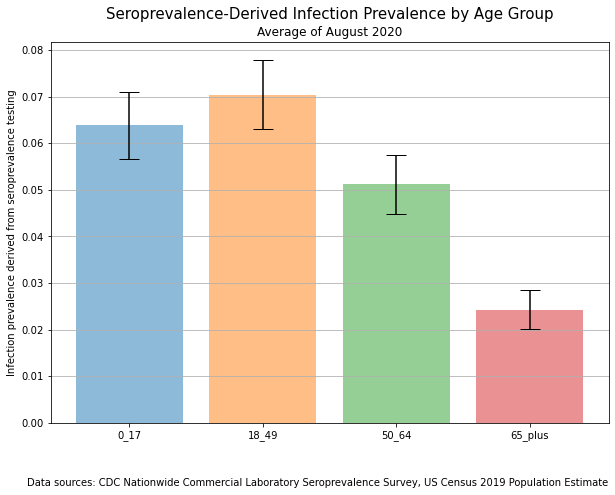

In [48]:
august_means, august_std = [], []
for ages in age_groups_list:
    august_means.append(august_df.sum()[f'n_est_infections_{ages}'] / august_df.sum()[f'pop_{ages}'])
    august_std.append(np.sqrt(august_df.sum()[f'stratum_std_err_contribution_{ages}']) / august_df.sum()[f'pop_{ages}'])

sup_title = '    Seroprevalence-Derived Infection Prevalence by Age Group'
sources_ = 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Infection prevalence derived from seroprevalence testing'
bar_chart_with_yerr(x_pos=range(len(age_groups_list)), means=august_means, std_devs=august_std, colors = ['C0', 'C1', 'C2', 'C3'],
                               suptitle=sup_title, sub_title='Average of August 2020', 
                               tick_labels=age_groups_list, sources=sources_, ylabel=y_label)

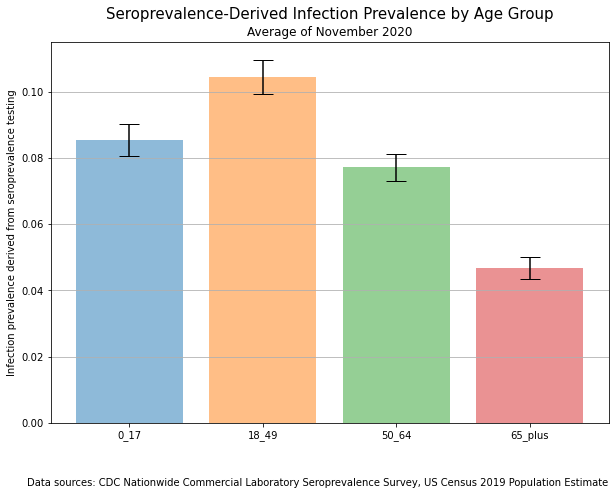

In [49]:
november_means, november_std = [], []
for ages in age_groups_list:
    november_means.append(november_df.sum()[f'n_est_infections_{ages}'] / november_df.sum()[f'pop_{ages}'])
    november_std.append(np.sqrt(november_df.sum()[f'stratum_std_err_contribution_{ages}']) / november_df.sum()[f'pop_{ages}'])

sup_title = '    Seroprevalence-Derived Infection Prevalence by Age Group'
sources_ = 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Infection prevalence derived from seroprevalence testing'
bar_chart_with_yerr(x_pos=range(len(age_groups_list)), means=november_means, std_devs=november_std, 
                               suptitle=sup_title, sub_title='Average of November 2020', colors = ['C0', 'C1', 'C2', 'C3'],
                               tick_labels=age_groups_list, sources=sources_, ylabel=y_label)

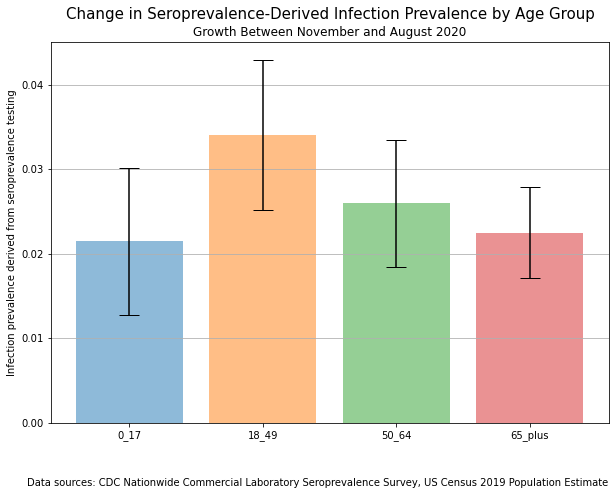

In [50]:
delta_means, delta_std = [], []
delta_means = [november_means[i] - august_means[i] for i in range(len(november_means))]
delta_std = [np.sqrt(november_std[i]**2 + august_std[i]**2) for i in range(len(november_means))]

sup_title = '    Change in Seroprevalence-Derived Infection Prevalence by Age Group'
sources_ = 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Infection prevalence derived from seroprevalence testing'
bar_chart_with_yerr(x_pos=range(len(age_groups_list)), means=delta_means, std_devs=delta_std, 
                               suptitle=sup_title, sub_title='Growth Between November and August 2020', 
                                colors = ['C0', 'C1', 'C2', 'C3'],
                               tick_labels=age_groups_list, sources=sources_, ylabel=y_label)

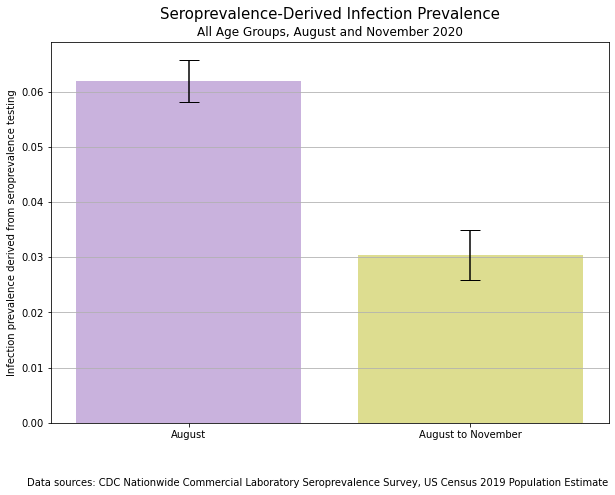

In [51]:
aug_nov_mean, aug_nov_std = [], []
aug_nov_mean.append(august_df.sum()[f'n_est_infections_from_table'] / august_df.sum()[f'N_catchment'])
aug_nov_std.append(np.sqrt(august_df.sum()[f'stratum_std_err_contribution_0_17'] + 
                 august_df.sum()[f'stratum_std_err_contribution_18_49'] +
                 august_df.sum()[f'stratum_std_err_contribution_50_64'] +
                 august_df.sum()[f'stratum_std_err_contribution_65_plus']) 
                 / august_df.sum()[f'N_catchment'])

aug_nov_mean.append(november_df.sum()[f'n_est_infections_from_table'] / november_df.sum()[f'N_catchment'] - 
                    august_df.sum()[f'n_est_infections_from_table'] / august_df.sum()[f'N_catchment'])
aug_nov_std.append(np.sqrt((np.sqrt(august_df.sum()[f'stratum_std_err_contribution_0_17'] + 
                 august_df.sum()[f'stratum_std_err_contribution_18_49'] +
                 august_df.sum()[f'stratum_std_err_contribution_50_64'] +
                 august_df.sum()[f'stratum_std_err_contribution_65_plus']) 
                 / august_df.sum()[f'N_catchment'])**2 +
                (np.sqrt(november_df.sum()[f'stratum_std_err_contribution_0_17'] + 
                 november_df.sum()[f'stratum_std_err_contribution_18_49'] +
                 november_df.sum()[f'stratum_std_err_contribution_50_64'] +
                 november_df.sum()[f'stratum_std_err_contribution_65_plus']) 
                 / november_df.sum()[f'N_catchment'])**2))

labels = ['August','August to November']
sup_title = '    Seroprevalence-Derived Infection Prevalence'
sources_ = 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Infection prevalence derived from seroprevalence testing'
bar_chart_with_yerr(x_pos=range(len(labels)), means=aug_nov_mean, std_devs=aug_nov_std, 
                               suptitle=sup_title, sub_title='All Age Groups, August and November 2020', 
                                 colors = ['C4', 'C8'],
                               tick_labels=labels, sources=sources_, ylabel=y_label)

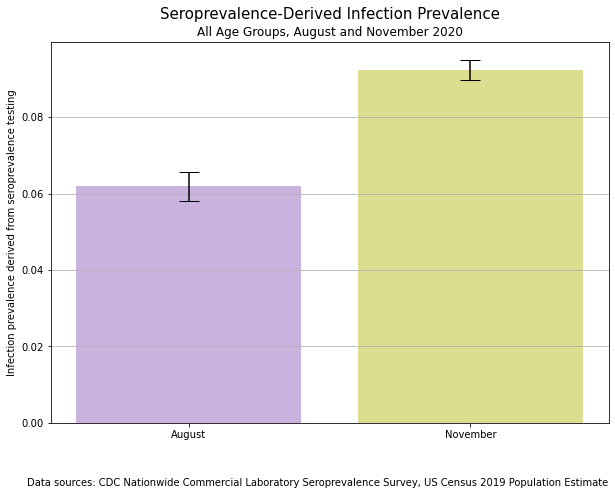

In [52]:
delta_aug_nov_mean, delta_aug_nov_std = [], []
delta_aug_nov_mean.append(august_df.sum()[f'n_est_infections_from_table'] / august_df.sum()[f'N_catchment'])
delta_aug_nov_std.append(np.sqrt(august_df.sum()[f'stratum_std_err_contribution_0_17'] + 
                 august_df.sum()[f'stratum_std_err_contribution_18_49'] +
                 august_df.sum()[f'stratum_std_err_contribution_50_64'] +
                 august_df.sum()[f'stratum_std_err_contribution_65_plus']) 
                 / august_df.sum()[f'N_catchment'])

delta_aug_nov_mean.append(november_df.sum()[f'n_est_infections_from_table'] / november_df.sum()[f'N_catchment'])
delta_aug_nov_std.append(np.sqrt(november_df.sum()[f'stratum_std_err_contribution_0_17'] + 
                 november_df.sum()[f'stratum_std_err_contribution_18_49'] +
                 november_df.sum()[f'stratum_std_err_contribution_50_64'] +
                 november_df.sum()[f'stratum_std_err_contribution_65_plus']) 
                 / november_df.sum()[f'N_catchment'])

labels = ['August','November']
sup_title = '    Seroprevalence-Derived Infection Prevalence'
sources_ = 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Infection prevalence derived from seroprevalence testing'
bar_chart_with_yerr(x_pos=range(len(labels)), means=delta_aug_nov_mean, std_devs=delta_aug_nov_std, 
                               suptitle=sup_title, sub_title='All Age Groups, August and November 2020', 
                                 colors = ['C4', 'C8'],
                               tick_labels=labels, sources=sources_, ylabel=y_label)

### Aggregating by seroprevalence round
Let's now aggregate the data by seroprevalence rounds (i.e. batches). Once this is done we will adjust the counts upwards to compensate for missing data.

In [54]:
sp_by_round_df = sp_and_census_df.groupby('Round').agg(
                                    pop_0_17 = ('pop_0_17', 'sum'),
                                    pop_18_49 = ('pop_18_49', 'sum'),
                                    pop_50_64 = ('pop_50_64', 'sum'),
                                    pop_65_plus = ('pop_65_plus', 'sum'),
                                    n_est_infections_0_17 = ('n_est_infections_0_17', 'sum'),
                                    n_est_infections_18_49 = ('n_est_infections_18_49', 'sum'),
                                    n_est_infections_50_64 = ('n_est_infections_50_64', 'sum'),
                                    n_est_infections_65_plus = ('n_est_infections_65_plus', 'sum'),
                                    n_est_infections_from_table = ('n_est_infections_from_table', 'sum'),
                                    last_date_of_round = ('date_range_close', 'max')
                                ).reset_index()

In [55]:
# Slight upward adjustment to counts to compensate for missing data
sp_by_round_df['pct_age_data_missing'] = (sp_by_round_df['n_est_infections_from_table'] - 
                                       sp_by_round_df['n_est_infections_0_17'] - 
                                       sp_by_round_df['n_est_infections_18_49'] - 
                                       sp_by_round_df['n_est_infections_50_64'] - 
                                       sp_by_round_df['n_est_infections_65_plus'] ) / sp_by_round_df['n_est_infections_from_table']

for ages in age_groups_list:
    sp_by_round_df[f'Est infections (from sp), {ages}'] = (sp_by_round_df[f'n_est_infections_{ages}'] / 
                                    sp_by_round_df[f'pop_{ages}'] / (1-sp_by_round_df['pct_age_data_missing']))

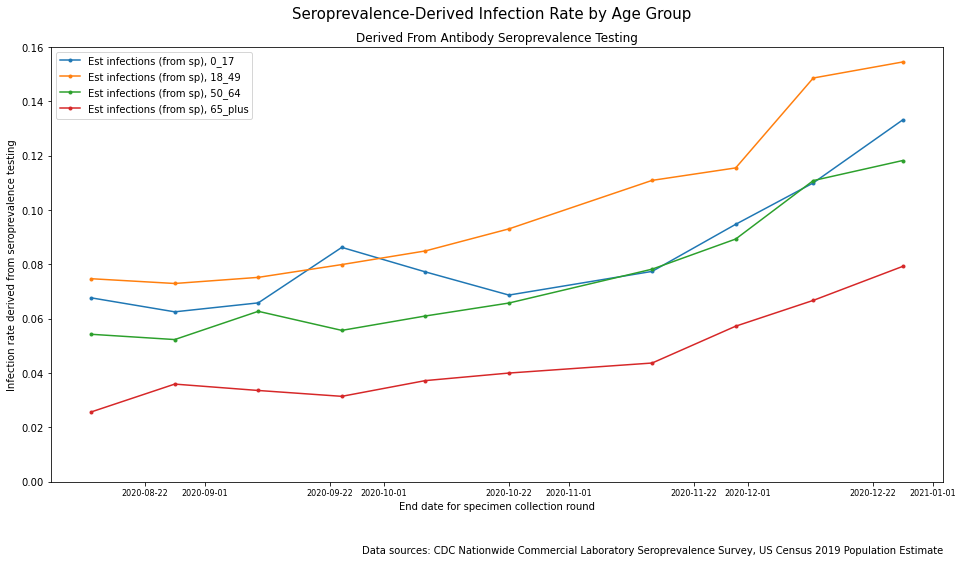

In [101]:
# Let's see what we have now.
fig, ax = plt.subplots(figsize = (16, 8))

for ages in age_groups_list:
    col_name = f'Est infections (from sp), {ages}'
    ax.plot(sp_by_round_df['last_date_of_round'],
            sp_by_round_df[col_name], 
            label = col_name,
            marker = '.')

ax.set_ylim(0,0.16)
ax.tick_params(axis='x', which='major', labelsize=8)
ax.set_xlabel('End date for specimen collection round')
ax.set_ylabel('Infection rate derived from seroprevalence testing')
ax.set_title('Derived From Antibody Seroprevalence Testing')
ax.legend()
fig.suptitle(f'    Seroprevalence-Derived Infection Rate by Age Group', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate', horizontalalignment='right');
plt.savefig(f'img/seroprev_by_age_and_period.png')

### Loading and preparing case diagnosis data for comparison 

Now we need to do the same thing with the case data--calculate the case rate by age group. Let's start by summing up cumulative cases for each age group in the CDC data. We'll loop through the data 8 times--once for each of the specimen collection rounds. For each loop, we'll cut off the count at the date corresponding to that particular specimen collection round's cutoff date. Finally, we will transpose our table and then convert the age groups from the CDC data to match the age groups for the seroprevalence data.

We're also going to need to pull in estimated population from the US Census so we can calculate case diagnosis infection rates.

In [57]:
rows_ = 10000000 #dataset is large. Need to limit rows and/or columns to load.
CDC_case_df1 = pd.read_csv('../data/COVID-19_Case_Surveillance_Public_Use_Data_Feb_2021.csv', 
                          usecols=[0,5,6], encoding='latin-1', nrows=rows_, skiprows=1, header=None)
CDC_case_df2 = pd.read_csv('../data/COVID-19_Case_Surveillance_Public_Use_Data_Feb_2021.csv', 
                          usecols=[0,5,6], encoding='latin-1', nrows=rows_, skiprows=10000001, header=None)
# Source: https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf/data

In [58]:
CDC_case_df = pd.concat([CDC_case_df1, CDC_case_df2], ignore_index=True)

In [59]:
CDC_case_df.columns = ['cdc_case_earliest_dt ', 'sex', 'age_group']

In [60]:
CDC_case_df = CDC_case_df[CDC_case_df['age_group']!='Missing'] # less than 1% unknowns, so drop them.

In [61]:
# Create a new DataFrame with each cases by age_groups in rows and by round in columns. Transpose to orient properly.
age_group_df = pd.DataFrame(CDC_case_df['age_group'].unique(), columns=['age_group'])
round_ = 1

for date_ in sp_by_round_df['last_date_of_round']:
    curr_case_df = (CDC_case_df[pd.to_datetime(CDC_case_df['cdc_case_earliest_dt ']) < date_].
                    groupby('age_group').count()
                    )
    curr_case_df = curr_case_df.rename(columns={'sex': round_})[round_].reset_index()
    round_ +=1
    age_group_df = age_group_df.merge(curr_case_df, on='age_group')

age_group_df = age_group_df.T
age_group_df.columns = age_group_df.iloc[0]
age_group_df = age_group_df[1:]
age_group_df = age_group_df.reset_index().rename(columns={'index':'Round'})

In [62]:
# Aligning case count age groups with seroprevalence age groups.
age_group_df['cases_0_17'] = (age_group_df['0 - 9 Years'] + 
                              4/5 * age_group_df['10 - 19 Years'])
age_group_df['cases_18_49'] = (1/5 * age_group_df['10 - 19 Years'] + 
                               age_group_df['20 - 29 Years'] + 
                               age_group_df['30 - 39 Years'] +
                               age_group_df['40 - 49 Years'])
age_group_df['cases_50_64'] = (age_group_df['50 - 59 Years'] + 
                               1/2 * age_group_df['60 - 69 Years'])
age_group_df['cases_65_plus'] = (1/2* age_group_df['60 - 69 Years'] + 
                               age_group_df['70 - 79 Years'] + 
                               age_group_df['80+ Years'])

### Comparing antibody seroprevalence counts to antigen diagnostic case counts

In [63]:
# Merge the two distinct DataFrames
sp_and_case_df = sp_by_round_df.merge(age_group_df, on='Round')

In [100]:
sp_and_case_df

,Round,pop_0_17,pop_18_49,pop_50_64,pop_65_plus,n_est_infections_0_17,n_est_infections_18_49,n_est_infections_50_64,n_est_infections_65_plus,n_est_infections_from_table,...,cases_65_plus_baseline,cases_65_plus_change_from_base,"Undercount rate (before August), 0_17","Undercount rate (before August), 18_49","Undercount rate (before August), 50_64","Undercount rate (before August), 65_plus","Undercount rate (from August), 0_17","Undercount rate (from August), 18_49","Undercount rate (from August), 50_64","Undercount rate (from August), 65_plus"
0,1,73037927,137050390,62906022,54058263,4661340.628,9.655833e+06,3219386.452,1309804.316,19987259.0,...,776443.5,-32606,10.090484,3.817098,3.312802,2.038488,-4.31979,-0.405203,-0.856245,8.37166
1,2,73037927,137050390,62906022,54058263,4361594.170,9.549073e+06,3143754.333,1855736.778,19802466.0,...,776443.5,32606,10.090484,3.817098,3.312802,2.038488,-4.31979,-0.405203,-0.856245,8.37166
2,3,73037927,137050390,62906022,54058263,4668091.053,1.000844e+07,3831199.817,1763457.688,20878315.0,...,776443.5,95724,10.090484,3.817098,3.312802,2.038488,1.42601,1.04085,5.14794,1.88758
3,4,73037927,137050390,62906022,54058263,6087073.635,1.058429e+07,3386356.438,1642508.391,22457026.0,...,776443.5,157582,10.090484,3.817098,3.312802,2.038488,8.819,1.55328,0.983699,0.379092
4,5,73037927,137050390,62906022,54058263,5307331.898,1.095296e+07,3610665.036,1893742.501,23132170.0,...,776443.5,239574,10.090484,3.817098,3.312802,2.038488,3.11663,1.47328,1.37416,1.29802
5,6,73037927,137050390,62906022,54058263,4879188.179,1.240094e+07,4023127.643,2103140.553,24071653.0,...,776443.5,349305,10.090484,3.817098,3.312802,2.038488,1.04972,2.1714,1.84878,1.48973
6,7,73037927,137050390,62906022,54058263,5064134.209,1.361315e+07,4408069.429,2115912.077,28136836.0,...,776443.5,666895,10.090484,3.817098,3.312802,2.038488,0.86092,1.64249,1.38899,0.799438
7,8,73037927,137050390,62906022,54058263,6485300.322,1.483486e+07,5266290.058,2900956.567,31460706.0,...,776443.5,924459,10.090484,3.817098,3.312802,2.038488,2.28696,1.57353,1.70567,1.4259
8,9,73037927,137050390,62906022,54058263,7371705.608,1.868779e+07,6398679.935,3311843.709,38971437.0,...,776443.5,1.22181e+06,10.090484,3.817098,3.312802,2.038488,2.52329,2.07438,1.98823,1.41518
9,10,73037927,137050390,62906022,54058263,9225747.838,2.008048e+07,7053465.275,4064444.248,42617643.0,...,776443.5,1.5338e+06,10.090484,3.817098,3.312802,2.038488,3.36744,1.92818,1.90413,1.61799


In [64]:
# Calculating the case undercount rates
for ages in age_groups_list:
    sp_and_case_df[f'Est infections (from cases), {ages}'] = (sp_and_case_df[f'cases_{ages}'] / sp_and_case_df[f'pop_{ages}'] /
                                           (1-pct_unknowns))
    sp_and_case_df[f'Undercount rate, {ages}'] = (sp_and_case_df[f'n_est_infections_{ages}'] / 
                                       sp_and_case_df[f'cases_{ages}'])


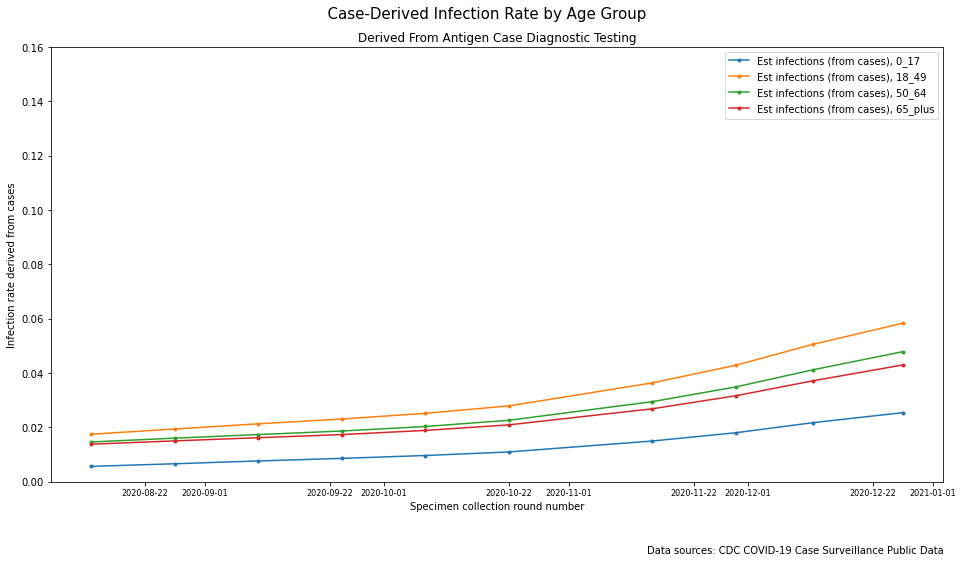

In [102]:
# Chart case-derived estimate of infection rate by age group
fig, ax = plt.subplots(figsize = (16, 8))

for ages in age_groups_list:
    col_name = f'Est infections (from cases), {ages}'
    ax.plot(sp_and_case_df['last_date_of_round'],
            sp_and_case_df[col_name], 
            label = col_name,
            marker = '.')

ax.tick_params(axis='x', which='major', labelsize=8)
ax.set_ylim(0,0.16)
ax.set_xlabel('Specimen collection round number')
ax.set_ylabel('Infection rate derived from cases')
ax.set_title('Derived From Antigen Case Diagnostic Testing')
ax.legend()
fig.suptitle(f'  Case-Derived Infection Rate by Age Group', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC COVID-19 Case Surveillance Public Data', horizontalalignment='right')
plt.savefig(f'img/cases_by_age_and_period.png');

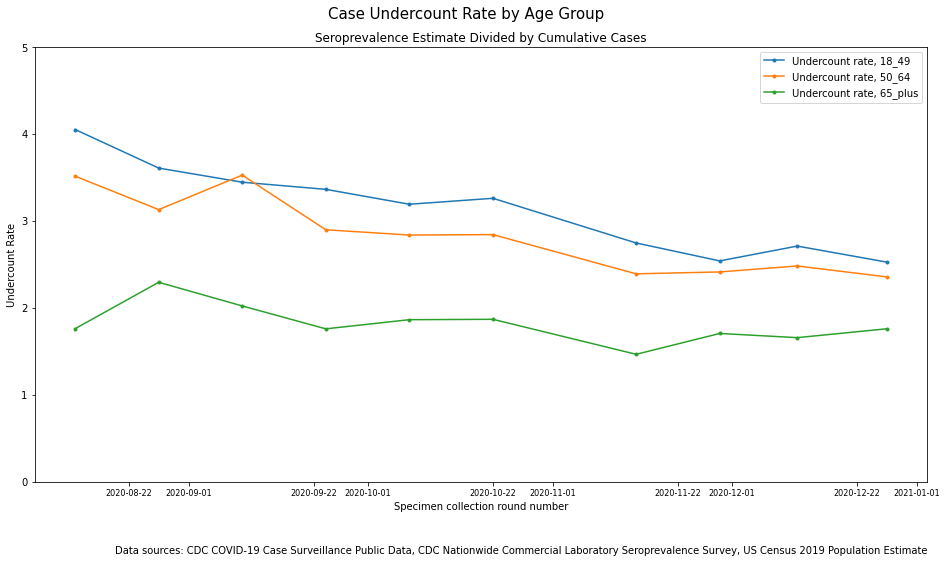

In [103]:
fig, ax = plt.subplots(figsize = (16, 8))

for ages in short_age_groups_list:
    col_name = f'Undercount rate, {ages}'
    ax.plot(sp_and_case_df['last_date_of_round'],
            sp_and_case_df[col_name], 
            label = col_name,
            marker = '.')

ax.tick_params(axis='x', which='major', labelsize=8)
ax.set_ylim(0,5)
ax.set_xlabel('Specimen collection round number')
ax.set_ylabel('Undercount Rate')
ax.set_title('Seroprevalence Estimate Divided by Cumulative Cases')
ax.legend()
fig.suptitle(f'Case Undercount Rate by Age Group', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC COVID-19 Case Surveillance Public Data, CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate', horizontalalignment='right')
plt.savefig(f'img/undercount_by_age_and_period.png');

Add in confidence intervals, statistical tests to describe how likely it is that the observed trends reflect actual trends. 

Try to come up with an estimate of how undercount rates by age have changed over time. Will need to estimate the undercount before August?

In [67]:
sp_and_case_df.columns

Index(['Round', 'pop_0_17', 'pop_18_49', 'pop_50_64', 'pop_65_plus',
       'n_est_infections_0_17', 'n_est_infections_18_49',
       'n_est_infections_50_64', 'n_est_infections_65_plus',
       'n_est_infections_from_table', 'last_date_of_round',
       'pct_age_data_missing', 'Est infections (from sp), 0_17',
       'Est infections (from sp), 18_49', 'Est infections (from sp), 50_64',
       'Est infections (from sp), 65_plus', '0 - 9 Years', '10 - 19 Years',
       '20 - 29 Years', '30 - 39 Years', '40 - 49 Years', '50 - 59 Years',
       '60 - 69 Years', '70 - 79 Years', '80+ Years', 'cases_0_17',
       'cases_18_49', 'cases_50_64', 'cases_65_plus',
       'Est infections (from cases), 0_17', 'Undercount rate, 0_17',
       'Est infections (from cases), 18_49', 'Undercount rate, 18_49',
       'Est infections (from cases), 50_64', 'Undercount rate, 50_64',
       'Est infections (from cases), 65_plus', 'Undercount rate, 65_plus'],
      dtype='object')

In [68]:
cols =['n_est_infections_0_17', 'n_est_infections_18_49', 'n_est_infections_50_64',
       'n_est_infections_65_plus', 'n_est_infections_from_table', 'cases_0_17', 'cases_18_49', 'cases_50_64',
       'cases_65_plus']

for ages in age_groups_list:
    col = f'n_est_infections_{ages}'
    baseline_new_name = col + '_baseline'
    sp_and_case_df[baseline_new_name] = (sp_and_case_df[col][0] + sp_and_case_df[col][1]) / 2
    change_new_name = col + '_change_from_base'
    sp_and_case_df[change_new_name] = sp_and_case_df[col] - sp_and_case_df[baseline_new_name]

for ages in age_groups_list:
    col = f'cases_{ages}'
    baseline_new_name = col + '_baseline'
    sp_and_case_df[baseline_new_name] = (sp_and_case_df[col][0] + sp_and_case_df[col][1]) / 2
    change_new_name = col + '_change_from_base'
    sp_and_case_df[change_new_name] = sp_and_case_df[col] - sp_and_case_df[baseline_new_name]

sp_and_case_df['Undercount rate (before August), 0_17'] = (sp_and_case_df['n_est_infections_0_17_baseline'] / 
                                       sp_and_case_df['cases_0_17_baseline'])
sp_and_case_df['Undercount rate (before August), 18_49'] = (sp_and_case_df['n_est_infections_18_49_baseline'] / 
                                        sp_and_case_df['cases_18_49_baseline'])
sp_and_case_df['Undercount rate (before August), 50_64'] = (sp_and_case_df['n_est_infections_50_64_baseline'] / 
                                        sp_and_case_df['cases_50_64_baseline'])
sp_and_case_df['Undercount rate (before August), 65_plus'] = (sp_and_case_df['n_est_infections_65_plus_baseline'] / 
                                          sp_and_case_df['cases_65_plus_baseline'])

sp_and_case_df['Undercount rate (from August), 0_17'] = (sp_and_case_df['n_est_infections_0_17_change_from_base'] / 
                                       sp_and_case_df['cases_0_17_change_from_base'])
sp_and_case_df['Undercount rate (from August), 18_49'] = (sp_and_case_df['n_est_infections_18_49_change_from_base'] / 
                                        sp_and_case_df['cases_18_49_change_from_base'])
sp_and_case_df['Undercount rate (from August), 50_64'] = (sp_and_case_df['n_est_infections_50_64_change_from_base'] / 
                                        sp_and_case_df['cases_50_64_change_from_base'])
sp_and_case_df['Undercount rate (from August), 65_plus'] = (sp_and_case_df['n_est_infections_65_plus_change_from_base'] / 
                                          sp_and_case_df['cases_65_plus_change_from_base'])

In [69]:
sp_and_case_df['cases_0_17_change_from_base']

0       -34694.6
1        34694.6
2         109834
3         178660
4         255360
5         350305
6         641949
7         863082
8    1.13353e+06
9    1.39996e+06
Name: cases_0_17_change_from_base, dtype: object

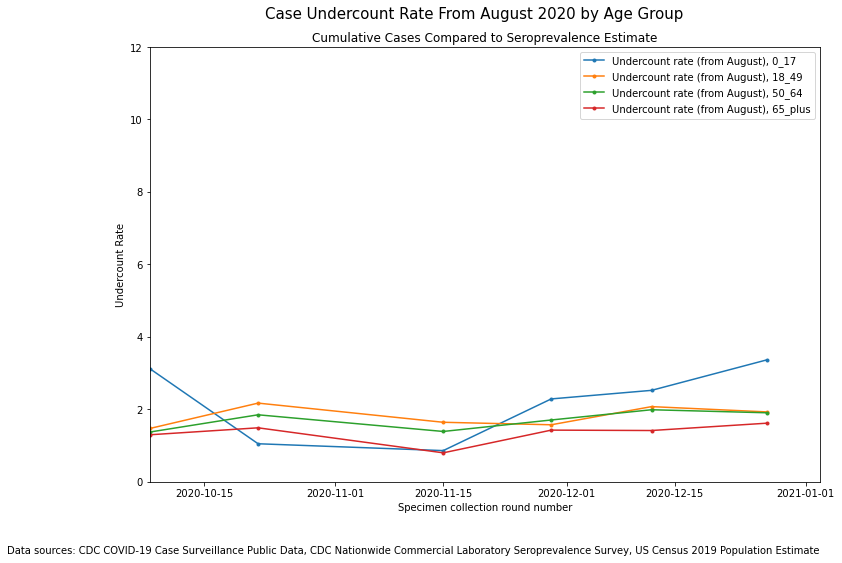

In [70]:
fig, ax = plt.subplots(figsize = (12, 8))

for ages in age_groups_list:
    col_name = f'Undercount rate (from August), {ages}'
    ax.plot(sp_and_case_df['last_date_of_round'],
            sp_and_case_df[col_name], 
            label = col_name,
            marker = '.')

ax.set_xlabel('Specimen collection round number')
ax.set_ylabel('Undercount Rate')
ax.set_title('Cumulative Cases Compared to Seroprevalence Estimate')
ax.set_xlim(left=sp_and_case_df['last_date_of_round'][4])
ax.set_ylim(0,12)
ax.legend()
fig.suptitle(f'Case Undercount Rate From August 2020 by Age Group', size=15, y=0.95)
plt.figtext(0.9, 0, 'Data sources: CDC COVID-19 Case Surveillance Public Data, CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate', horizontalalignment='right');

In [71]:
summary_df = sp_and_case_df[sp_and_case_df['last_date_of_round']>'2020-10-01']

for col_name in ['Undercount rate (before August), 0_17', 'Undercount rate (before August), 18_49', 
                 'Undercount rate (before August), 50_64', 'Undercount rate (before August), 65_plus',
                 'Undercount rate (from August), 0_17', 'Undercount rate (from August), 18_49', 
                 'Undercount rate (from August), 50_64', 'Undercount rate (from August), 65_plus']:
    print(col_name[-7:], '  ', summary_df[col_name].mean())

), 0_17    10.090483762960147
, 18_49    3.817097974342378
, 50_64    3.3128020776010483
65_plus    2.0384877289847876
), 0_17    2.200827310313414
, 18_49    1.8105438360724901
, 50_64    1.7016617361757584
65_plus    1.341041910993552


## New section comparing August to difference between November and August

In [72]:
aug_case_rate_by_age, nov_minus_aug_case_rate_by_age = [], []
aug_ttl, nov_minus_aug_ttl, pop_ttl = 0, 0, 0
for ages in age_groups_list:
    aug_ttl += sp_and_case_df[f'cases_{ages}'].iloc[0]
    nov_minus_aug_ttl += sp_and_case_df[f'cases_{ages}'].iloc[6] - sp_and_case_df[f'cases_{ages}'].iloc[0]
    pop_ttl += sp_and_case_df[f'pop_{ages}'][0]
    
    aug_rate = sp_and_case_df[f'Est infections (from cases), {ages}'].iloc[:1].mean()
    nov_rate = sp_and_case_df[f'Est infections (from cases), {ages}'].iloc[6:7].mean()
    aug_case_rate_by_age.append(aug_rate)
    nov_minus_aug_case_rate_by_age.append(nov_rate - aug_rate)
case_rate_ttls = [aug_ttl / pop_ttl, nov_minus_aug_ttl / pop_ttl]

In [73]:
august_undercount_by_age = [august_means[i] / aug_case_rate_by_age[i] for i in range(len(august_means))]
august_undercount_by_age_std = [august_std[i] / august_means[i] * august_undercount_by_age[i]
                               for i in range(len(august_std))]

nov_minus_aug_undercount_by_age = [delta_means[i] / nov_minus_aug_case_rate_by_age[i] 
                                   for i in range(len(delta_means))]
nov_minus_aug_undercount_by_age_std = [delta_std[i] / delta_means[i] * nov_minus_aug_undercount_by_age[i] 
                                      for i in range(len(delta_means))]

august_delta_nov_undercount_ttl = [aug_nov_mean[i] / case_rate_ttls[i] for i in range(len(aug_nov_mean))]
august_delta_nov_undercount_std = [aug_nov_std[i] / aug_nov_mean[i] * august_delta_nov_undercount_ttl[i] 
                                   for i in range(len(aug_nov_mean))]


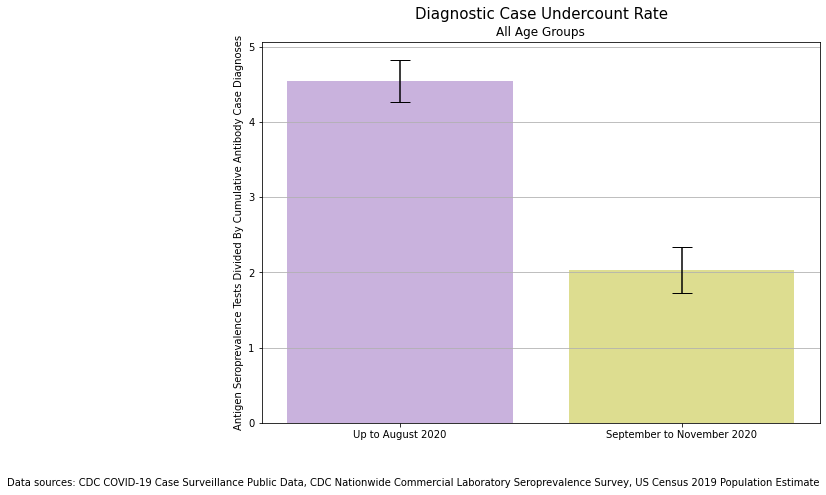

In [74]:

labels = ['Up to August 2020','September to November 2020']
sup_title = '    Diagnostic Case Undercount Rate'
sources_ = 'Data sources: CDC COVID-19 Case Surveillance Public Data, CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Antigen Seroprevalence Tests Divided By Cumulative Antibody Case Diagnoses'
bar_chart_with_yerr(x_pos=range(len(labels)), means=august_delta_nov_undercount_ttl, std_devs=august_delta_nov_undercount_std, 
                               suptitle=sup_title, sub_title='All Age Groups', colors = ['C4', 'C8'],
                               tick_labels=labels, sources=sources_, ylabel=y_label, chartname='all_august_before_after')

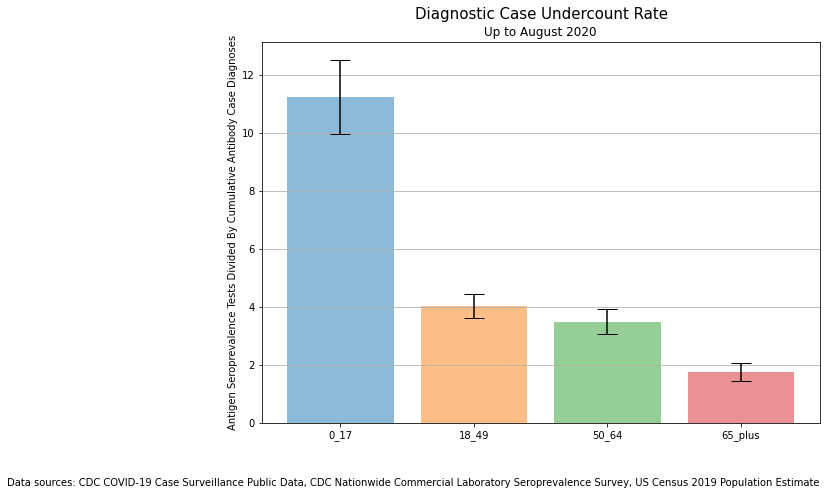

In [75]:
labels = age_groups_list
sup_title = '    Diagnostic Case Undercount Rate'
sources_ = 'Data sources: CDC COVID-19 Case Surveillance Public Data, CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Antigen Seroprevalence Tests Divided By Cumulative Antibody Case Diagnoses'
bar_chart_with_yerr(x_pos=range(len(labels)), means=august_undercount_by_age, std_devs=august_undercount_by_age_std, 
                               suptitle=sup_title, sub_title='Up to August 2020', colors = ['C0', 'C1', 'C2', 'C3'],
                               tick_labels=labels, sources=sources_, ylabel=y_label)

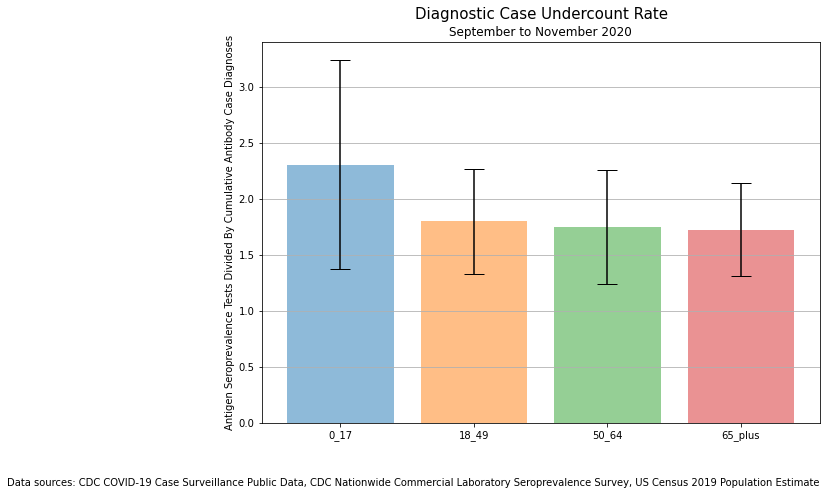

In [76]:
labels = age_groups_list
sup_title = '    Diagnostic Case Undercount Rate'
sources_ = 'Data sources: CDC COVID-19 Case Surveillance Public Data, CDC Nationwide Commercial Laboratory Seroprevalence Survey, US Census 2019 Population Estimate'
y_label = 'Antigen Seroprevalence Tests Divided By Cumulative Antibody Case Diagnoses'
bar_chart_with_yerr(x_pos=range(len(labels)), means=nov_minus_aug_undercount_by_age, std_devs=nov_minus_aug_undercount_by_age_std, 
                               suptitle=sup_title, sub_title='September to November 2020', colors = ['C0', 'C1', 'C2', 'C3'],
                               tick_labels=labels, sources=sources_, ylabel=y_label)